# Predict and classify dataset with a PCM model

Load model, predict class labels for any dataset and plot results. 
__TODO__: explain more (pyxpcm, where to find some exemples of models or datasets) and logos 

In [1]:
import xarray as xr
import numpy as np

import pyxpcm
from pyxpcm.models import pcm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import Plotter
from Plotter import Plotter #new class for plots in pyxpcm

from PIL import Image

import importlib

## User input
***

__Choose dataset__

In [2]:
#### file path ####

# GLOBAL-ANALYSIS-FORECAST-PHY-001-024
#file_path = '/export/home1/agarciaj/datasets/global-analysis-forecast-phy-001-024_1598520725098.nc'

# GLOBAL_REANALYSIS_PHY_001_030
file_path = '/export/home1/agarciaj/datasets/global-reanalysis-phy-001-030-monthly_1601036810235.nc'

# GLOBAL_REANALYSIS_PHY_001_031
#file_path = '/export/home1/agarciaj/datasets/global-reanalysis-phy-001-031-grepv2-monthly_1598972586332.nc'

# GLOBAL_REANALYSIS_BIO_001_029
#file_path = '/export/home1/agarciaj/datasets/global-reanalysis-bio-001-029-monthly_1598524945308.nc

Variables names in dataset (__TODO__: find an elegant way to do that)

In [3]:
# time and coordinates dimensions (expecify then here but use a generic name in the rest of the notebook)
time_dim = 'time'
lon_dim = 'longitude'
let_dim = 'latitude'
z_dim = 'depth' #y
var_name = 'thetao' # var_name = 'fe' #y

__Choose model__

In [4]:
# Model path
model_path = 'models/tests_model_GLOBAL_REANALYSIS_PHY_001_030_temp.nc'

# Variable to be predict {variable name in model: variable name in dataset}
features_in_ds = {'temperature': var_name}

__Plot options__

## Load model and dataset
***

__Load model__

In [5]:
m = pyxpcm.load_netcdf(model_path)
m

<pcm 'gmm' (K: 8, F: 1)>
Number of class: 8
Number of feature: 1
Feature names: odict_keys(['temperature'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 43.932334

__Load dataset__

In [ ]:
ds = xr.open_dataset(file_path)

# format
# depth should be negative
ds['depth'] = -np.abs(ds['depth'].values)
# depth attribute 'axis' for Plotter instance
ds.depth.attrs['axis'] = 'Z'
ds

Quick plot of dataset

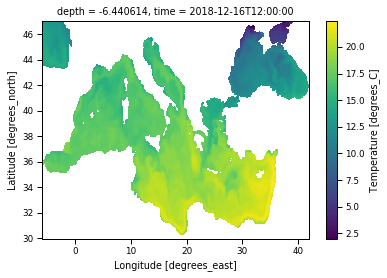

In [7]:
ds[var_name].isel(time=11, depth=5).plot();

## Predict labels
***

Predict class labels

In [8]:
m.predict(ds, features=features_in_ds, dim=z_dim, inplace=True);

Probability of a profile to be in a class

In [9]:
m.predict_proba(ds, features=features_in_ds, dim=z_dim, inplace=True);

Classes quantiles (q=0.5 median profiles representing each class)

In [10]:
ds = ds.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=var_name, outname=var_name + '_Q', keep_attrs=True, inplace=True)

/export/home1/agarciaj/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


Robustness

In [ ]:
ds.pyxpcm.robustness(m, inplace=True)
ds.pyxpcm.robustness_digit(m, inplace=True)

## Plot results
***

In [12]:
P = Plotter(ds, m)

#### 1. Vertical structure of classes

Figure saved in figures/test.png


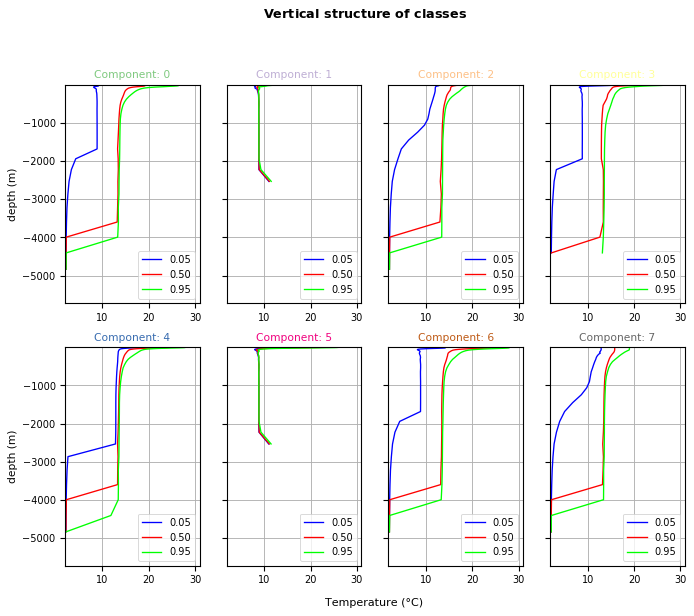

In [13]:
P.vertical_structure(q_variable = var_name + '_Q', sharey=True, xlabel='Temperature (°C)')
#P.save_BlueCloud('figures/vertical_struc_EX.png')
P.save_BlueCloud('figures/test.png')

Figure saved in figures/test.png


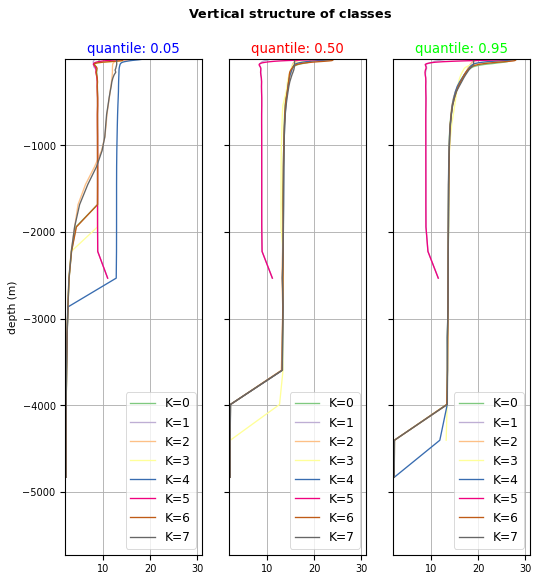

In [14]:
P.vertical_structure_comp(q_variable = var_name + '_Q', plot_q= 'all')
#P.save_BlueCloud('figures/vertical_struc_comp_EX.png')
P.save_BlueCloud('figures/test.png')

#### 2. Spatial distribution of classes

Figure saved in figures/test.png


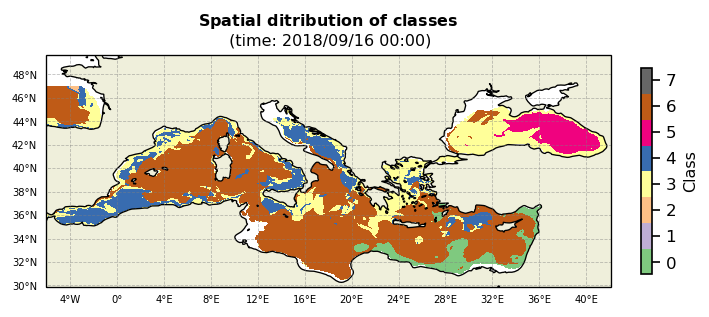

In [15]:
# TODO: when using isel hours are not good
# Input should have only one time step
P.spatial_distribution(time_slice=8)
#P.save_BlueCloud('figures/spatial_distr_EX.png')
P.save_BlueCloud('figures/test.png')

Figure saved in figures/test.png


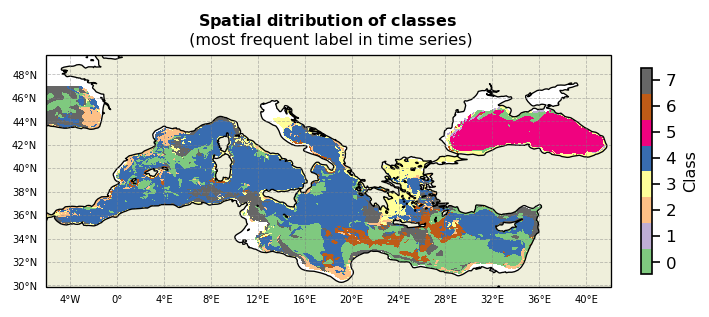

In [20]:
P.spatial_distribution(time_slice='most_freq_label')
#P.save_BlueCloud('figures/spatial_distr_freq_EX.png')
P.save_BlueCloud('figures/test.png')

#### 3. Robustness

Figure saved in figures/test_robustness.png


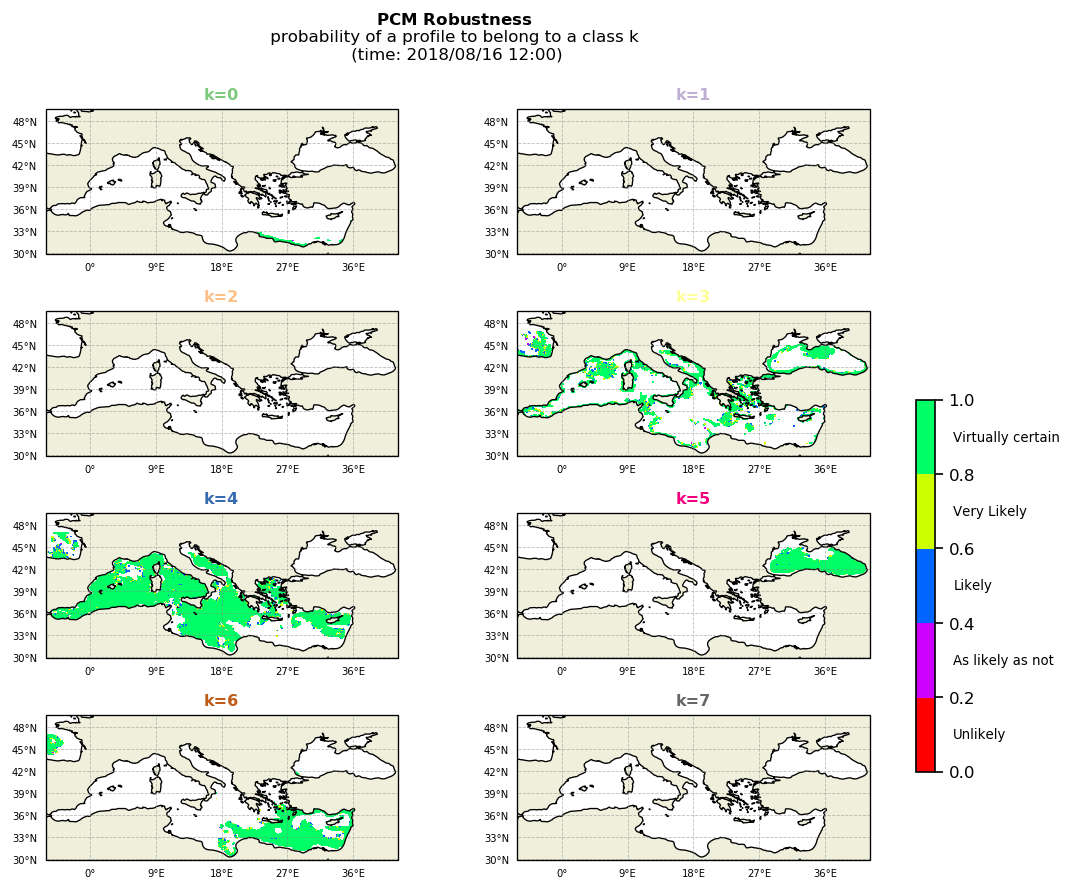

In [16]:
# Input should have only one time step
P.plot_robustness(time_slice=7)
#P.save_BlueCloud('figures/robustness_EX.png')
P.save_BlueCloud('figures/test_robustness.png')

#### 4. Classes pie chart

Figure saved in figures/test.png


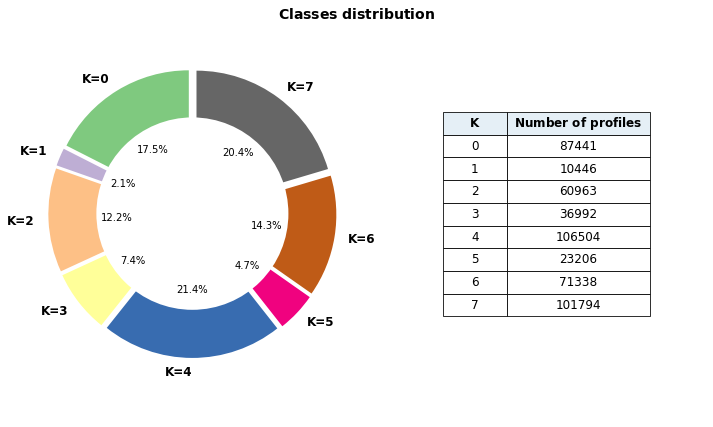

In [17]:
P.pie_classes()
#P.save_BlueCloud('figures/pie_chart_EX.png')
P.save_BlueCloud('figures/test.png')

#### 4. Temporal representation 

Bar plot by __month__

Figure saved in figures/test.png


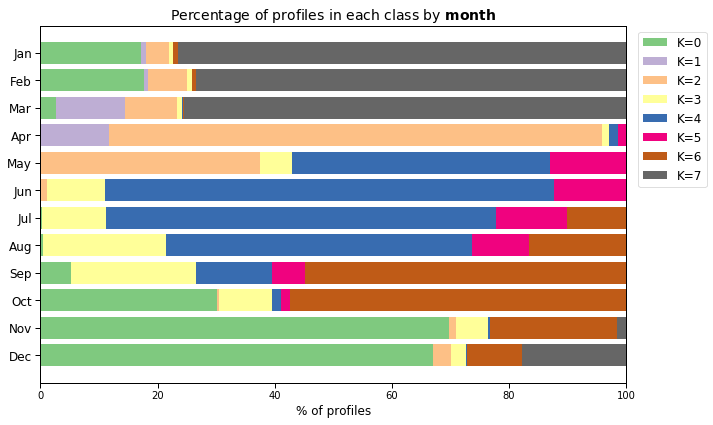

In [18]:
P.temporal_distribution(time_bins = 'month')
#P.save_BlueCloud('figures/temporal_distr_months_EX.png')
P.save_BlueCloud('figures/test.png')

Bar plot by __season__

Figure saved in figures/test.png


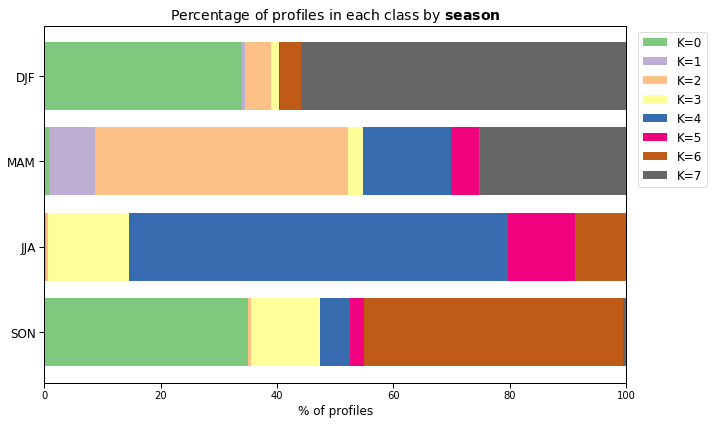

In [19]:
P.temporal_distribution(time_bins = 'season')
#P.save_BlueCloud('figures/temporal_distr_season_EX.png')
P.save_BlueCloud('figures/test.png')